In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import  cv2
%matplotlib inline

指定数据集路径

In [11]:
dataset_path = 'animals'
os.chdir(dataset_path)
os.listdir()

['丛林狼',
 '乌贼',
 '乌鸦',
 '乌龟',
 '仓鼠',
 '企鹅',
 '刺猬',
 '啄木鸟',
 '大嘴巴鸟',
 '大猩猩',
 '大象',
 '天鹅',
 '奶牛',
 '小白鼠',
 '山羊',
 '斑马',
 '斑马鹿',
 '松鼠',
 '毛虫',
 '水母',
 '水獭',
 '河马',
 '浣熊',
 '海星',
 '海豚',
 '海豹',
 '海马',
 '火烈鸟',
 '火鸡',
 '熊',
 '熊猫',
 '牛',
 '牡蛎',
 '犀牛',
 '狐狸',
 '狗',
 '狮',
 '狼',
 '猩猩',
 '猪',
 '猫',
 '猫头鹰',
 '獾',
 '瓢虫',
 '甲虫',
 '章鱼',
 '绵羊',
 '羚羊',
 '老鼠',
 '考拉',
 '苍蝇',
 '虎',
 '蚊子',
 '蛇',
 '蛾',
 '蜂鸟',
 '蜜蜂',
 '蜥蜴',
 '蜻蜓',
 '蝗虫',
 '蝙蝠',
 '蝴蝶',
 '螃蟹',
 '蟑螂',
 '袋熊',
 '袋貂',
 '袋鼠',
 '豪猪',
 '豹',
 '野兔',
 '野牛',
 '野猪',
 '金鱼',
 '马',
 '驯鹿',
 '驴',
 '鬣狗',
 '鲨鱼',
 '鲸',
 '鸭',
 '鸽子',
 '鹅',
 '鹈形目',
 '鹦鹉',
 '鹬',
 '鹰',
 '鹿',
 '麻雀',
 '黑猩猩',
 '龙虾']

In [8]:
df = pd.DataFrame()
for animal in tqdm(os.listdir()):
    os.chdir(animal)
    for file in os.listdir():
        try:
            img = cv2.imread(file)
            df = df.append({'类别':animal,"文件名":file,"图像宽":img.shape[1],"图像高":img.shape[0]},ignore_index=True)
        except:
            print(os.path.join(animal,file),"读取错误")
    os.chdir('../')
os.chdir('../')


100%|██████████| 90/90 [01:37<00:00,  1.08s/it]


In [9]:
df


,图像宽,图像高,文件名,类别
0,1920.0,1080.0,004c3aef03.jpg,丛林狼
1,275.0,183.0,0058a88ed6.jpg,丛林狼
2,1024.0,792.0,030b91da73.jpg,丛林狼
3,275.0,183.0,0a151f5c78.jpg,丛林狼
4,275.0,183.0,0b1ae678e9.jpg,丛林狼
...,...,...,...,...
5395,1280.0,832.0,ec0b16bd10.jpg,龙虾
5396,2848.0,2848.0,f2ddf67e19.jpg,龙虾
5397,2265.0,2265.0,f63ab72460.jpg,龙虾
5398,1200.0,679.0,fb8a0aab90.jpg,龙虾


可视化图像尺寸分布

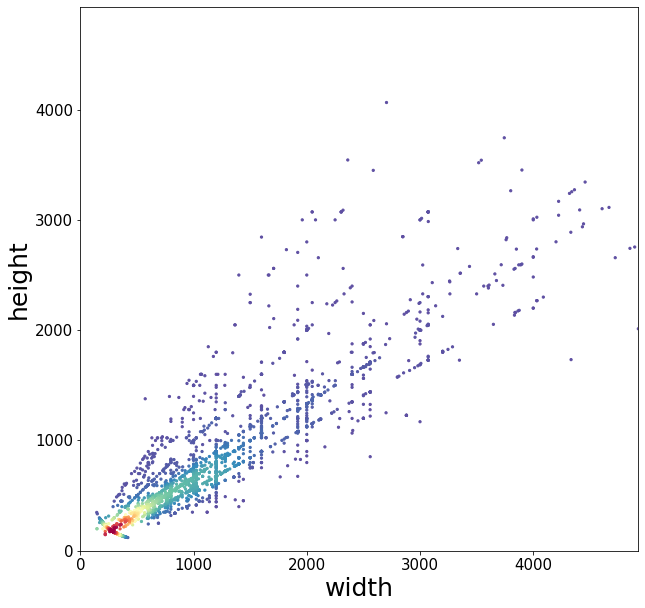

In [10]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
x = df['图像宽']
y = df['图像高']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x,y,z = x[idx],y[idx],z[idx]

plt.figure(figsize=(10,10))
plt.scatter(x,y,c=z,s=5,cmap='Spectral_r')
plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']),max(df['图像高']))
plt.xlim(xmin = 0,xmax=xy_max)
plt.ylim(ymin = 0,ymax = xy_max)

plt.xlabel('width',fontsize = 25)
plt.ylabel('height',fontsize = 25)
plt.savefig('图像尺寸分布.pdf',dpi = 120,bbox_inches='tight')
plt.show()
